## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from itertools import combinations
%matplotlib inline

In [71]:
data_df = pd.read_csv('data/kc_house_data.csv')

In [72]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [115]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [116]:
# too many cols for corr
data_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Issues -
nulls - waterfront, view, yr_renovated
date - wrong datatype
sqft_basement - why is it object?
zipcode probably shouldbe string



In [ ]:
#waterfornt values

In [4]:
data_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
p_waterfront = 146/(19075+146)
p_waterfront 

0.007595858696217679

In [6]:
likely_wrong = p_waterfront * (21597-19221)
likely_wrong

18.047760262213206

In [36]:
# dont want to use median or mean as it is a binary column,
# filling in the nans randomly using probability observed in the recorded data
# gives us no advantage over just using 0 given as there its far more likely
# that a 1 one erroneously fall on a 0 rather than correctly on a 1. 
# Only around 18 false values likley, so not going to skew values too much

In [120]:
data_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# replace with 0 as that is the dummy value for places that haven't been done up
# possibly worth making into a new feature of renovted v not renovated, and then 
# testing relantionship between year renovated and price

In [121]:
data_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [ ]:
#assume the nans are no views

In [73]:
data_df = data_df.fillna({'waterfront' : 0.1, 'view' : 0.1, 'yr_renovated': 0.1,  'view' : 0.1})
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [74]:
data_df["date"] = pd.to_datetime(data_df["date"])
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [124]:
data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1770.0        1
20.0          1
1024.0        1
666.0         1
266.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [75]:
#insert 0
data_df['sqft_basement'].replace(to_replace='?', value=0.0, inplace=True)
data_df['sqft_basement'] = data_df['sqft_basement'].astype(float)
data_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [76]:
data_df['zipcode'] = data_df['sqft_basement'].astype(object)
data_df['zipcode']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [163]:
data_df['zipcode'].unique()

array([0.0, 400.0, 910.0, 1530.0, 730.0, 1700.0, 300.0, 970.0, 760.0,
       720.0, 700.0, 820.0, 780.0, 790.0, 330.0, 1620.0, 360.0, 588.0,
       1510.0, 410.0, 990.0, 600.0, 560.0, 550.0, 1000.0, 1600.0, 500.0,
       1040.0, 880.0, 1010.0, 240.0, 265.0, 290.0, 800.0, 540.0, 710.0,
       840.0, 380.0, 770.0, 480.0, 570.0, 1490.0, 620.0, 1250.0, 1270.0,
       120.0, 650.0, 180.0, 1130.0, 450.0, 1640.0, 1460.0, 1020.0, 1030.0,
       750.0, 640.0, 1070.0, 490.0, 1310.0, 630.0, 2000.0, 390.0, 430.0,
       850.0, 210.0, 1430.0, 1950.0, 440.0, 220.0, 1160.0, 860.0, 580.0,
       2060.0, 1820.0, 1180.0, 200.0, 1150.0, 1200.0, 680.0, 530.0,
       1450.0, 1170.0, 1080.0, 960.0, 280.0, 870.0, 1100.0, 460.0, 1400.0,
       660.0, 1220.0, 900.0, 420.0, 1580.0, 1380.0, 475.0, 690.0, 270.0,
       350.0, 935.0, 1370.0, 980.0, 1470.0, 160.0, 950.0, 50.0, 740.0,
       1780.0, 1900.0, 340.0, 470.0, 370.0, 140.0, 1760.0, 130.0, 520.0,
       890.0, 1110.0, 150.0, 1720.0, 810.0, 190.0, 1290.0, 6

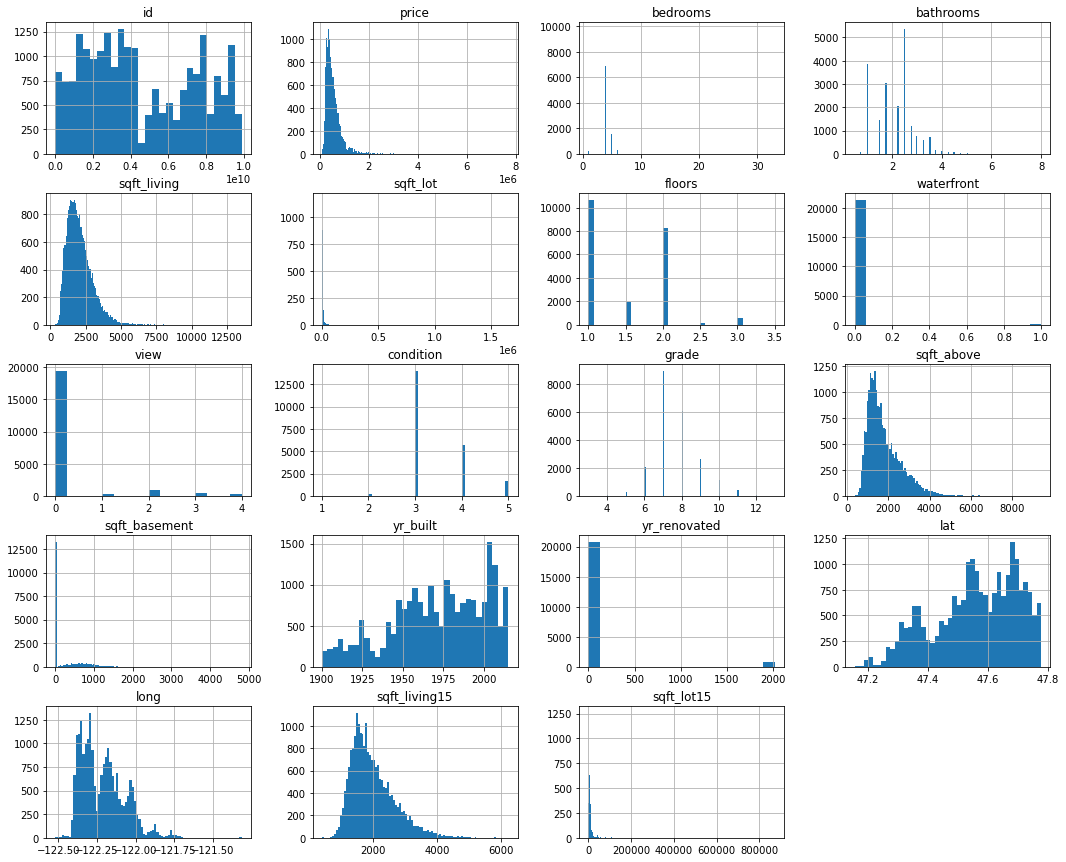

In [11]:
data_df.hist(figsize=(18,15), bins='auto');

In [77]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']

In [ ]:
# q about 0s cat or cont?
zero_skew = ['sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15']
no_zero =X_train.copy()
for zs in zero_skew:
    no_zero = no_zero.loc[no_zero[zs] !=0]
no_zero.describe()

In [78]:
#list high outliers in indie variables
high_lot = data_df[data_df['sqft_lot'] > 500000]
high_lot15 = data_df[data_df['sqft_lot15'] > 300000]
high_price = data_df[data_df['price'] > 4000000]
high_lot.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.799022e+09,8.457095e+05,3.190476,2.607143,2871.142857,8.056800e+05,1.642857,0.066667,0.714286,3.476190,8.476190,2673.047619,198.095238,1977.190476,0.028571,47.453410,-122.026286,2068.571429,228850.380952
std,1.004976e+09,4.398517e+05,1.077917,1.108409,1505.610816,2.900225e+05,0.550973,0.217562,1.189237,0.749603,1.990453,1421.620747,499.395825,31.555695,0.046291,0.161034,0.243621,528.708669,249531.300428
min,2.250790e+08,1.900000e+05,1.000000,1.000000,710.000000,5.013760e+05,1.000000,0.000000,0.000000,2.000000,5.000000,710.000000,0.000000,1915.000000,0.000000,47.162200,-122.514000,1280.000000,11700.000000
25%,8.220390e+08,5.500000e+05,2.000000,1.750000,1679.000000,5.423220e+05,1.000000,0.000000,0.000000,3.000000,7.000000,1679.000000,0.000000,1955.000000,0.000000,47.378200,-122.024000,1710.000000,60548.000000
50%,1.923039e+09,7.900000e+05,3.000000,2.500000,2560.000000,8.433090e+05,2.000000,0.000000,0.000000,3.000000,8.000000,2350.000000,0.000000,1990.000000,0.000000,47.456400,-121.949000,2030.000000,112384.000000
75%,2.623069e+09,9.375000e+05,4.000000,3.250000,3900.000000,9.822780e+05,2.000000,0.000000,2.000000,4.000000,10.000000,3770.000000,0.000000,2003.000000,0.100000,47.538500,-121.882000,2290.000000,325393.000000
max,3.626079e+09,2.000000e+06,5.000000,5.500000,6530.000000,1.651359e+06,3.000000,1.000000,3.000000,5.000000,12.000000,6530.000000,1940.000000,2009.000000,0.100000,47.695500,-121.744000,3420.000000,871200.000000


In [79]:
high_lot15.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.602296e+09,6.647023e+05,3.227273,2.386364,2837.454545,4.062393e+05,1.568182,0.004545,0.681818,3.363636,8.181818,2542.909091,272.272727,1974.363636,90.427273,47.430986,-122.020227,2091.363636,422185.954545
std,1.099165e+09,4.262460e+05,0.972567,1.125271,1447.816146,3.954938e+05,0.495106,0.021320,1.170525,0.581087,1.867934,1348.056093,590.487545,30.915469,424.052166,0.215418,0.202489,644.096232,154516.076916
min,1.200691e+08,1.800000e+05,2.000000,1.000000,960.000000,3.225000e+04,1.000000,0.000000,0.000000,2.000000,5.000000,960.000000,0.000000,1912.000000,0.000000,47.162200,-122.506000,1010.000000,310582.000000
25%,6.200716e+08,3.850000e+05,3.000000,1.750000,1712.500000,1.091170e+05,1.000000,0.000000,0.000000,3.000000,7.000000,1649.750000,0.000000,1947.000000,0.000000,47.237025,-122.027500,1590.000000,328395.000000
50%,1.486015e+09,5.750000e+05,3.000000,2.500000,2525.000000,2.585285e+05,1.500000,0.000000,0.000000,3.000000,8.000000,2395.000000,0.000000,1979.000000,0.000000,47.420700,-121.970500,1940.000000,383545.500000
75%,2.524337e+09,7.800000e+05,4.000000,3.062500,3425.000000,5.412128e+05,2.000000,0.000000,1.500000,4.000000,9.000000,3040.000000,0.000000,2001.750000,0.000000,47.629625,-121.904500,2540.000000,424927.500000
max,3.623029e+09,2.000000e+06,6.000000,5.500000,6530.000000,1.651359e+06,2.500000,0.100000,3.000000,4.000000,12.000000,6530.000000,1940.000000,2009.000000,1989.000000,47.772100,-121.756000,3420.000000,871200.000000


In [80]:
high_lot_ids = high_lot['id'].tolist()
high_lot15_ids = high_lot15['id'].tolist()
high_price_ids = high_price['id'].tolist()

In [81]:
id_list = []
id_list.extend(high_lot_ids)
id_list.extend(high_lot15_ids) 
id_list.extend(high_price_ids) 

In [82]:
no_outliers = data_df[~data_df.id.isin(id_list)]

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [88]:
zeros_list = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
for z in zeros_list:
    no_outliers[z].replace(to_replace=0, value=0.1, inplace=True)
no_outliers.head()

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.1,0.1,...,7,1180,0.1,1955,0.1,0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.1,0.1,...,7,2170,400.0,1951,1991.0,400,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.1,0.1,...,6,770,0.1,1933,0.1,0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.1,0.1,...,7,1050,910.0,1965,0.1,910,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.1,0.1,...,8,1680,0.1,1987,0.1,0,47.6168,-122.045,1800,7503


In [85]:
no_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.1,0.0,...,7,1180,0.1,1955,0.0,0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,400,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.1,1933,0.1,0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,910,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.1,1987,0.0,0,47.6168,-122.045,1800,7503


In [89]:
no_outliers['year_sold'] = no_outliers['date'].dt.year
no_outliers['year_sold'].head()

<ipython-input-89-723ae2da9162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['year_sold'] = no_outliers['date'].dt.year


0    2014
1    2014
2    2015
3    2014
4    2015
Name: year_sold, dtype: int64

In [90]:
no_outliers.drop(labels='date', axis=1, inplace=True)
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21549 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21549 non-null  int64  
 1   price          21549 non-null  float64
 2   bedrooms       21549 non-null  int64  
 3   bathrooms      21549 non-null  float64
 4   sqft_living    21549 non-null  int64  
 5   sqft_lot       21549 non-null  int64  
 6   floors         21549 non-null  float64
 7   waterfront     21549 non-null  float64
 8   view           21549 non-null  float64
 9   condition      21549 non-null  int64  
 10  grade          21549 non-null  int64  
 11  sqft_above     21549 non-null  int64  
 12  sqft_basement  21549 non-null  float64
 13  yr_built       21549 non-null  int64  
 14  yr_renovated   21549 non-null  float64
 15  zipcode        21549 non-null  object 
 16  lat            21549 non-null  float64
 17  long           21549 non-null  float64
 18  sqft_l

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
no_outliers.drop(labels='zipcode', axis=1, inplace=True)

# Preprocessing


In [92]:
cont_df = np.log(abs(no_outliers))
cont_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold
0,22.687479,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,-2.302585,-2.302585,1.098612,1.945910,7.073270,-2.302585,7.578145,-2.302585,3.860965,4.806125,7.200425,8.639411,7.607878
1,22.581765,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,-2.302585,-2.302585,1.098612,1.945910,7.682482,5.991465,7.576097,7.596392,3.865372,4.806632,7.432484,8.941022,7.607878
2,22.451642,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,-2.302585,-2.302585,1.098612,1.791759,6.646391,-2.302585,7.566828,-2.302585,3.865726,4.805929,7.908387,8.994917,7.608374
3,21.634424,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,-2.302585,-2.302585,1.609438,1.945910,6.956545,6.813445,7.583248,-2.302585,3.861168,4.807237,7.215240,8.517193,7.607878
4,21.393349,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,-2.302585,-2.302585,1.098612,2.079442,7.426549,-2.302585,7.594381,-2.302585,3.863186,4.804390,7.495542,8.923058,7.608374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,19.387665,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,-2.302585,-2.302585,1.098612,2.079442,7.333023,-2.302585,7.605392,-2.302585,3.864917,4.806853,7.333023,7.319202,7.607878
21593,22.610345,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,-2.302585,-2.302585,1.098612,2.079442,7.745003,-2.302585,7.607878,-2.302585,3.860955,4.806984,7.512071,8.881836,7.608374
21594,21.144145,12.904459,0.693147,-0.287682,6.927558,7.207860,0.693147,-2.302585,-2.302585,1.098612,1.945910,6.927558,-2.302585,7.605392,-2.302585,3.862715,4.806469,6.927558,7.604396,7.607878
21595,19.489899,12.899220,1.098612,0.916291,7.377759,7.778211,0.693147,-2.302585,-2.302585,1.098612,2.079442,7.377759,-2.302585,7.602900,-2.302585,3.861456,4.804586,7.251345,7.160069,7.608374


In [93]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
preprocessed = cont_df.apply(normalize)

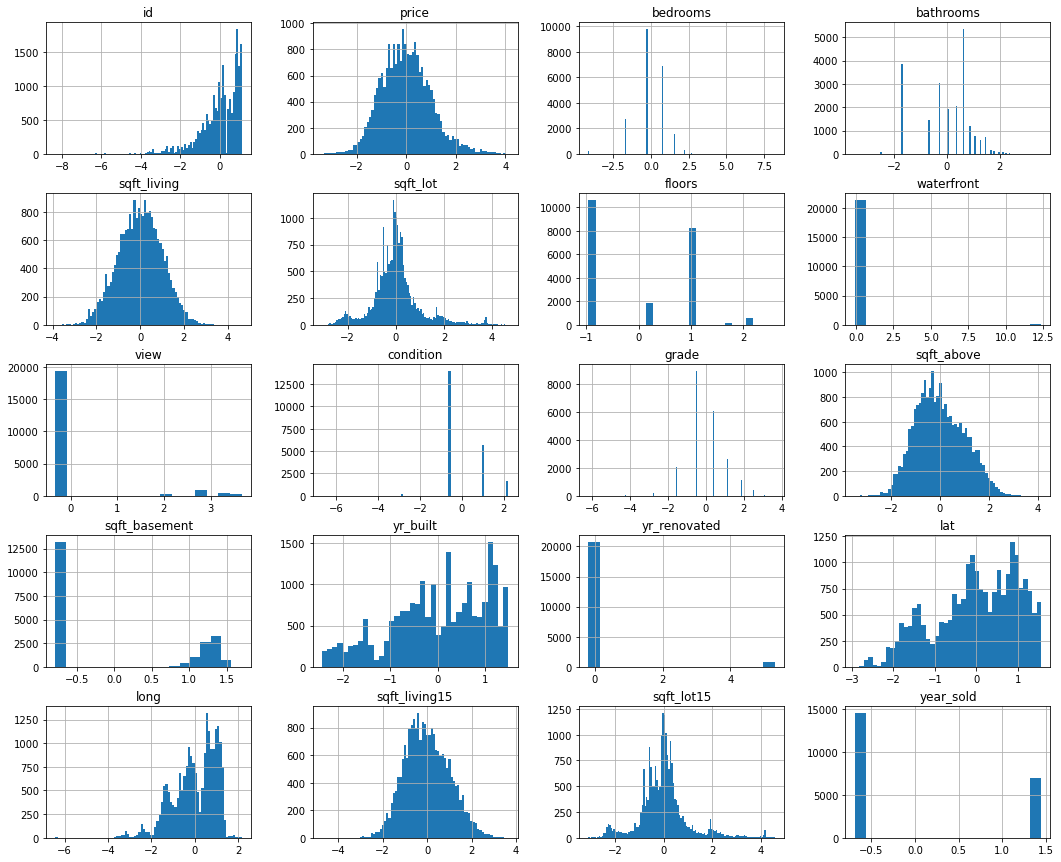

In [94]:
preprocessed.hist(figsize=(18,15), bins='auto');


In [68]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21549 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21549 non-null  float64
 1   price          21549 non-null  float64
 2   bedrooms       21549 non-null  float64
 3   bathrooms      21549 non-null  float64
 4   sqft_living    21549 non-null  float64
 5   sqft_lot       21549 non-null  float64
 6   floors         21549 non-null  float64
 7   waterfront     0 non-null      float64
 8   view           0 non-null      float64
 9   condition      21549 non-null  float64
 10  grade          21549 non-null  float64
 11  sqft_above     21549 non-null  float64
 12  sqft_basement  21549 non-null  float64
 13  yr_built       21549 non-null  float64
 14  yr_renovated   0 non-null      float64
 15  lat            21549 non-null  float64
 16  long           21549 non-null  float64
 17  sqft_living15  21549 non-null  float64
 18  sqft_l

# Split into target/features and test train

In [152]:
y = preprocessed[['price']]
X = preprocessed.drop(["price", 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Baseline model

In [141]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.7664450142373807

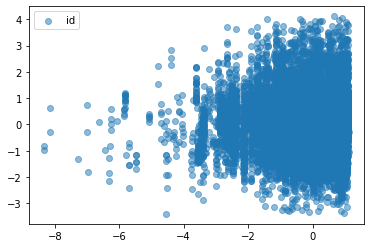

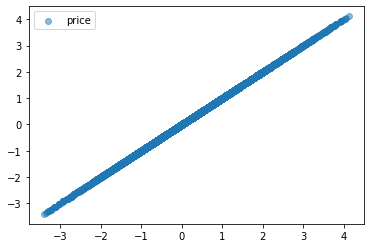

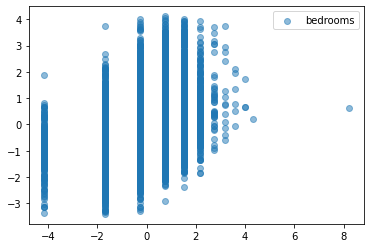

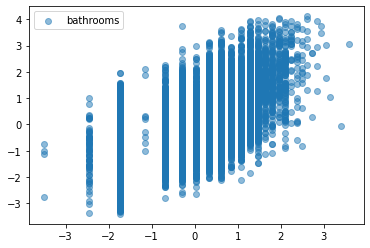

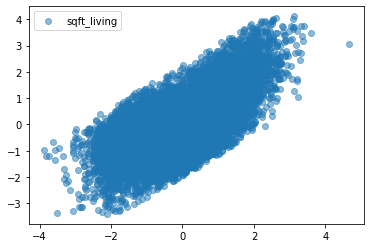

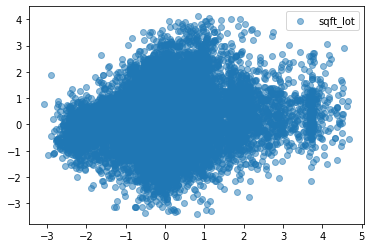

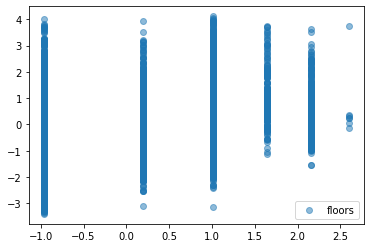

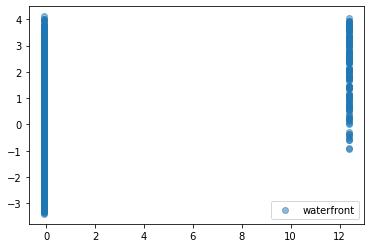

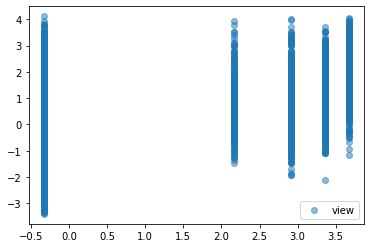

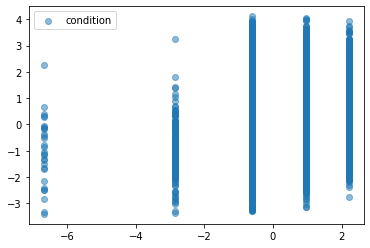

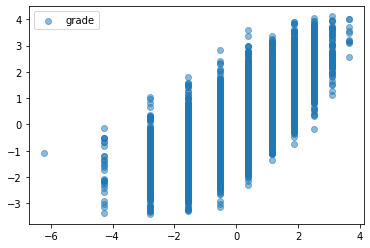

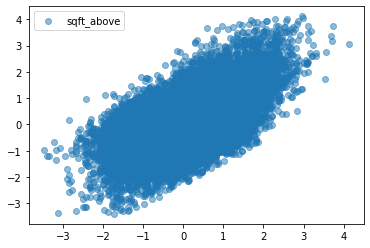

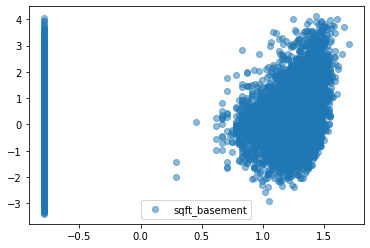

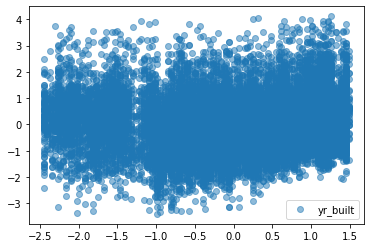

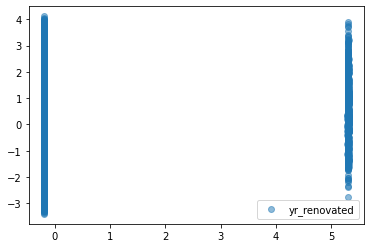

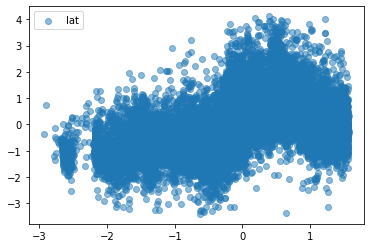

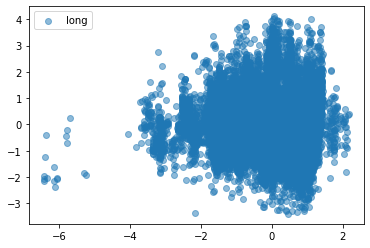

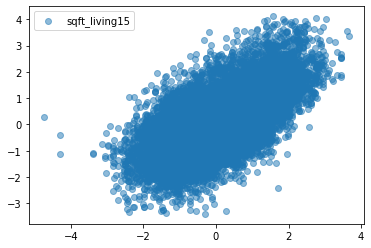

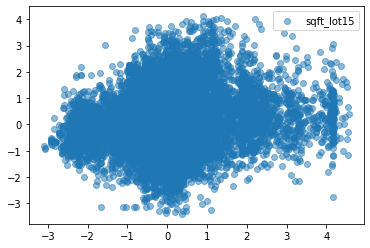

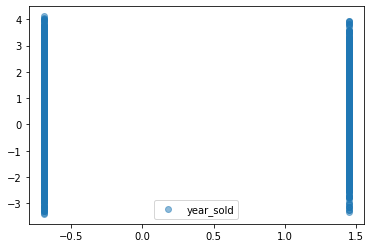

In [97]:
for col in preprocessed:
    plt.scatter(preprocessed[col], preprocessed['price'], label = col, alpha=0.5)
    plt.legend()
    plt.show()

id normality tests
['id', 2.840206587906291e-05, -3.00454106039183e-15, -0.005329358861926041, 0.4340456047623299, 794.8087272490781]


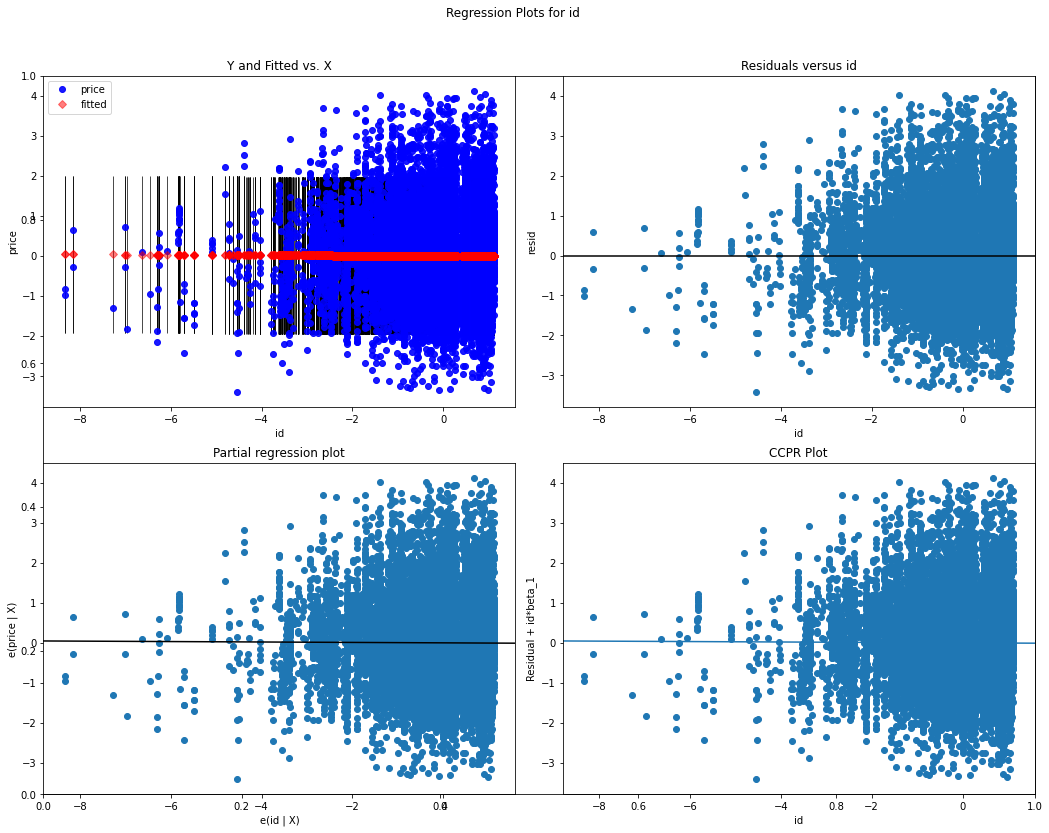

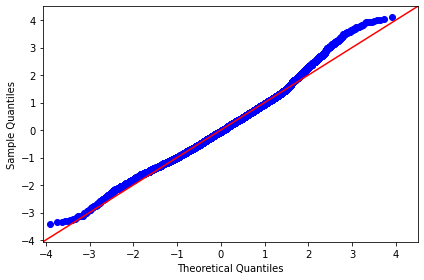

price normality tests
['price', 1.0, -3.00454106039183e-15, 1.0, 0.0, 2740.3042660236724]


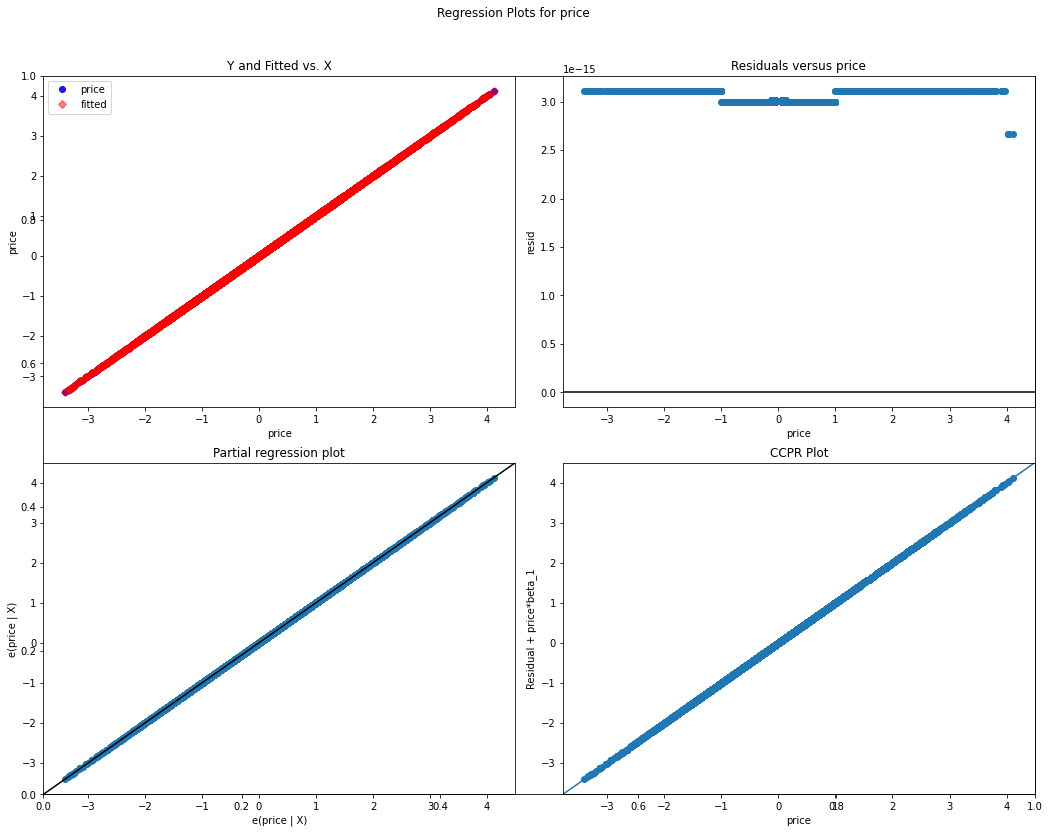

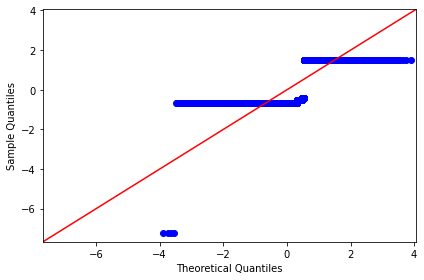

bedrooms normality tests
['bedrooms', 0.11662507152793389, -3.00454106039183e-15, 0.34150413105544153, 0.0, 512.1583857574918]


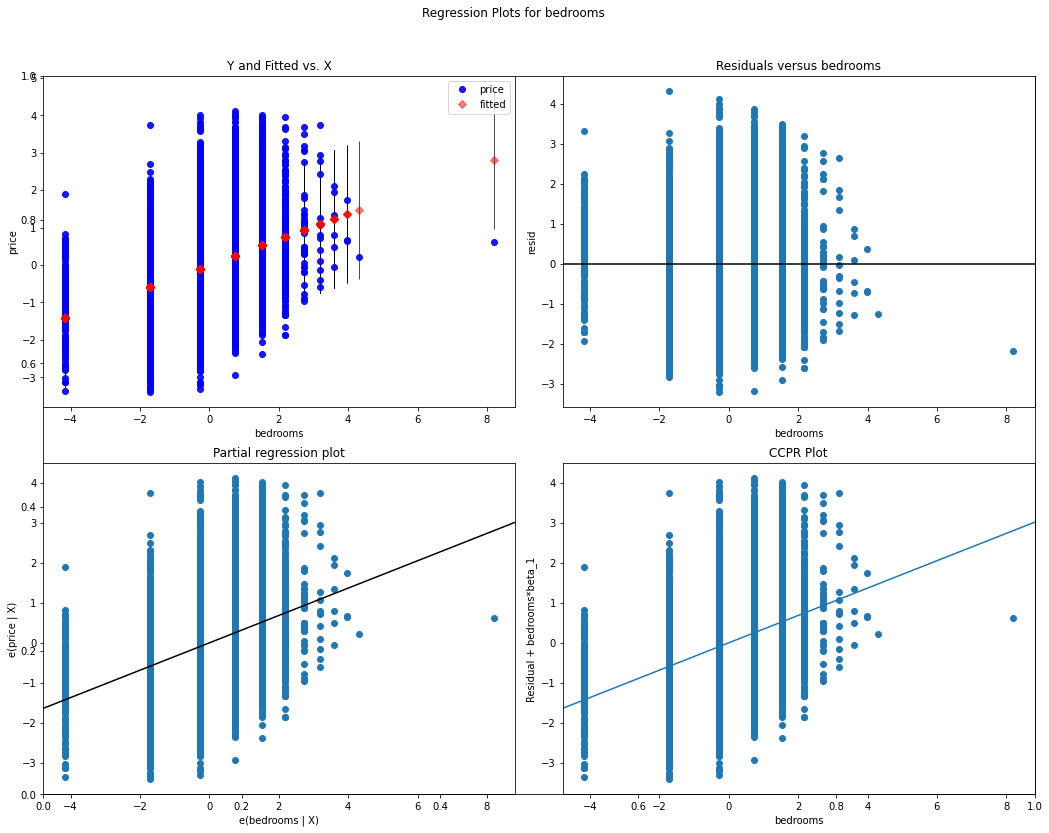

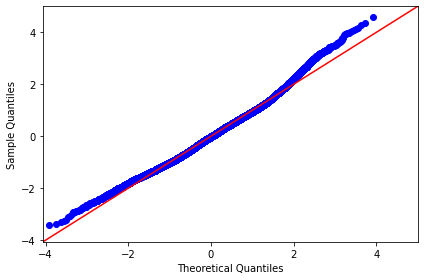

bathrooms normality tests
['bathrooms', 0.26760230155336284, -3.00454106039183e-15, 0.5173029108301668, 0.0, 293.8943920426216]


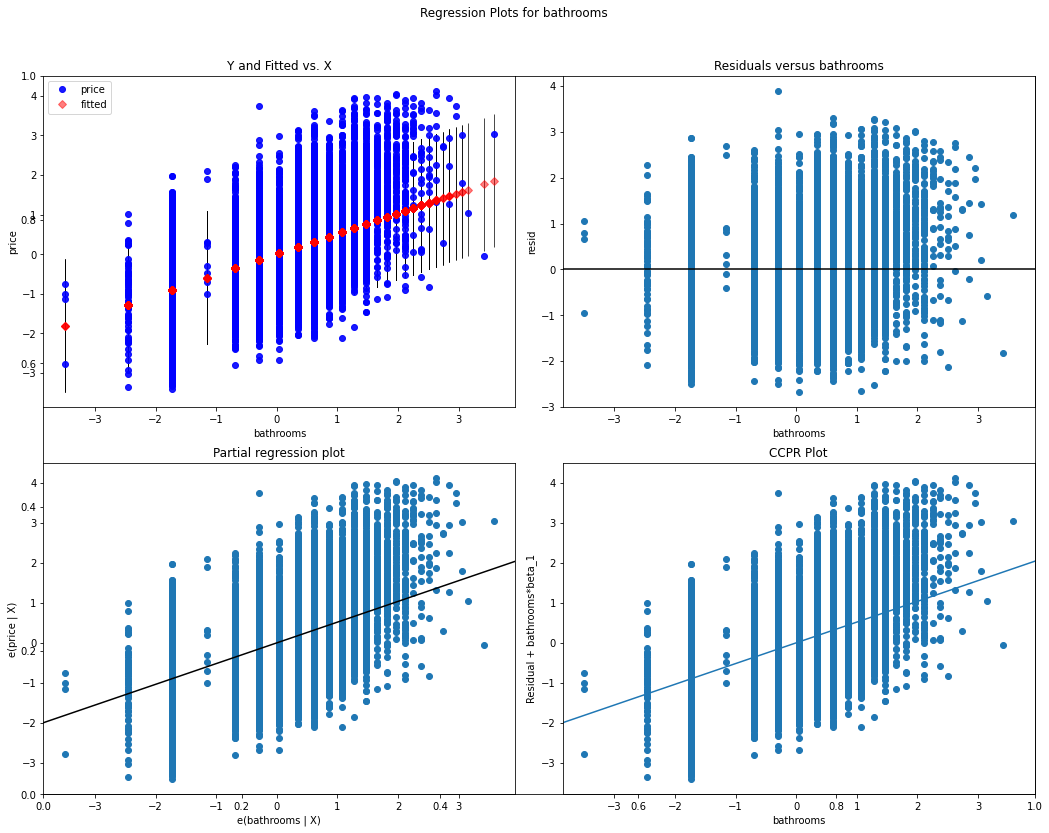

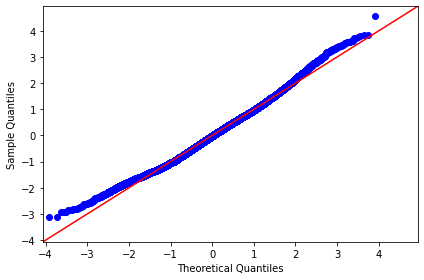

sqft_living normality tests
['sqft_living', 0.45154419086398756, -3.00454106039183e-15, 0.6719703794543239, 0.0, 111.91894981955326]


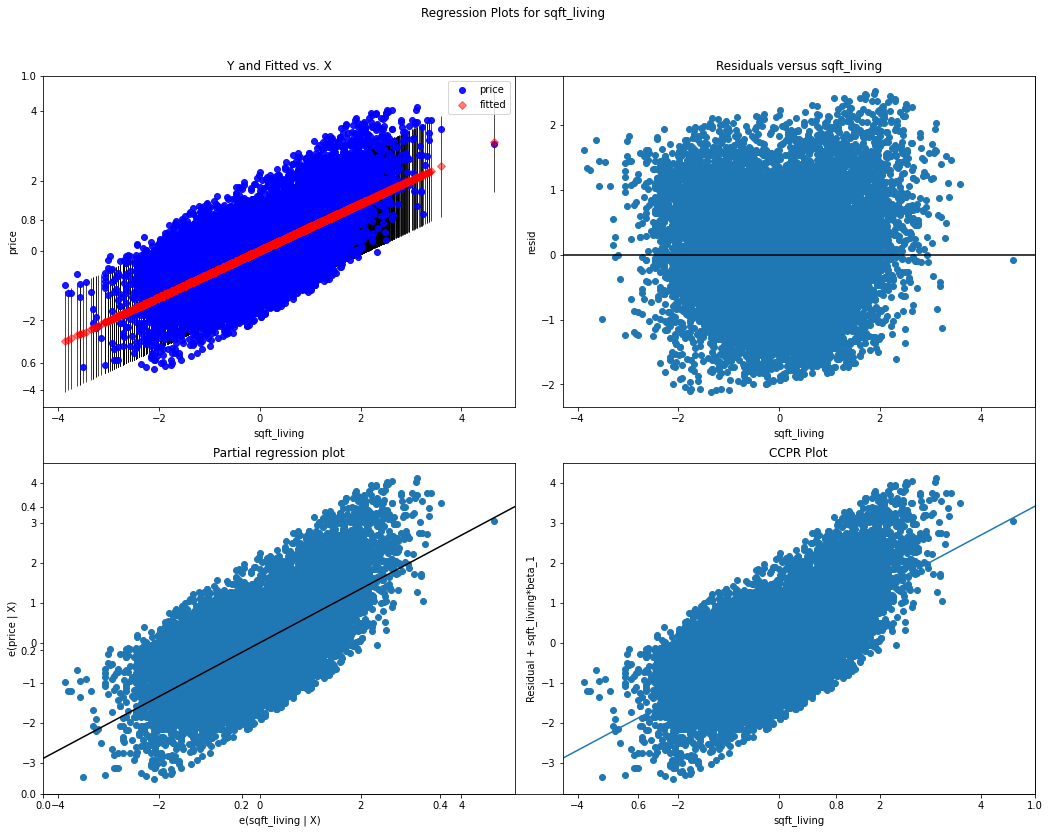

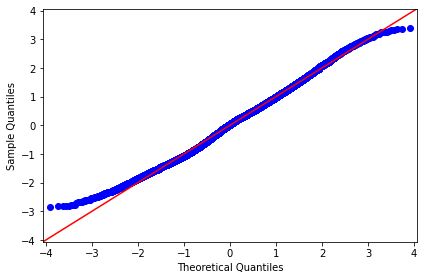

sqft_lot normality tests
['sqft_lot', 0.017812885813982104, -3.00454106039183e-15, 0.13346492353417047, 3.260842194113346e-86, 546.6267829759765]


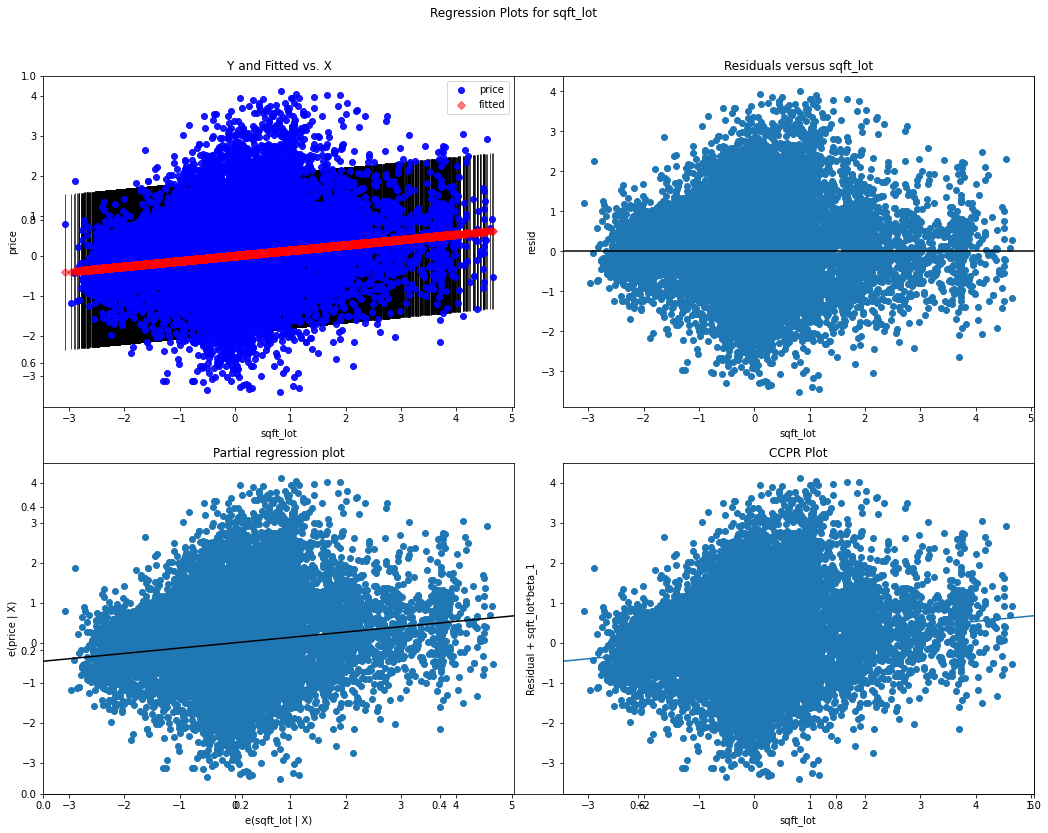

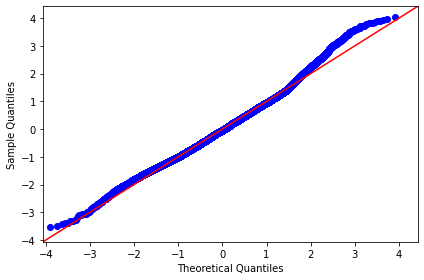

floors normality tests
['floors', 0.10392449968282746, -3.00454106039183e-15, 0.32237323040666366, 0.0, 787.8238746369583]


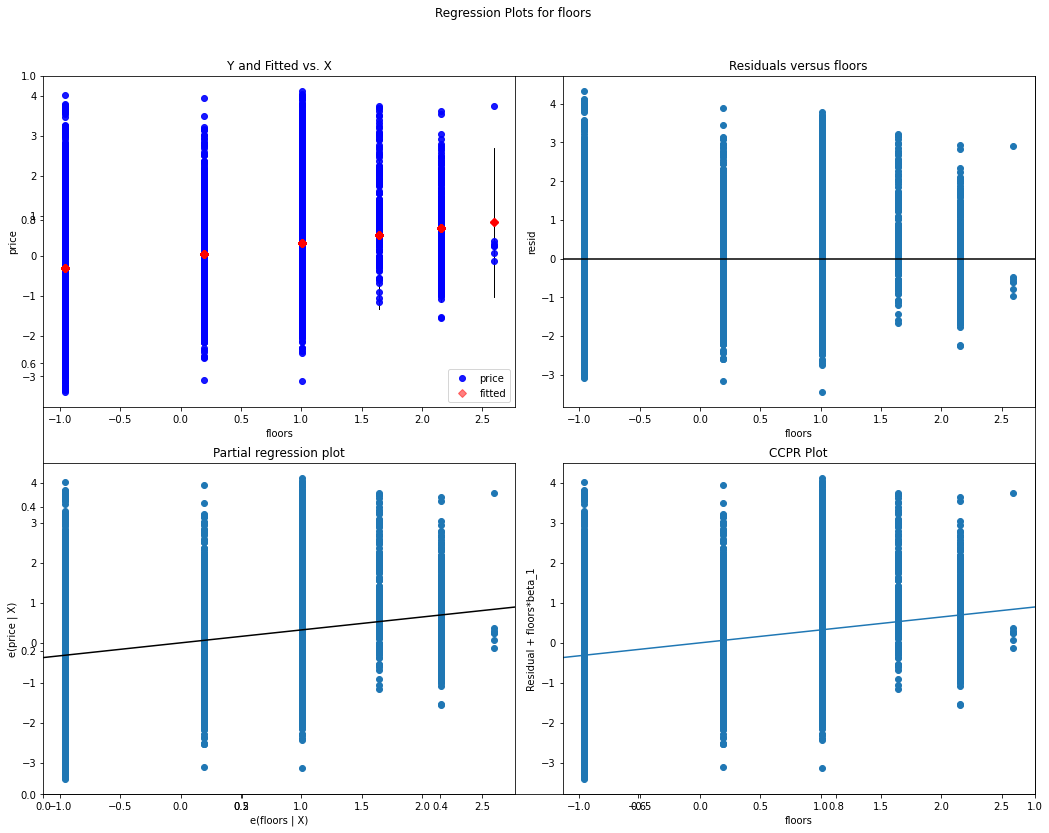

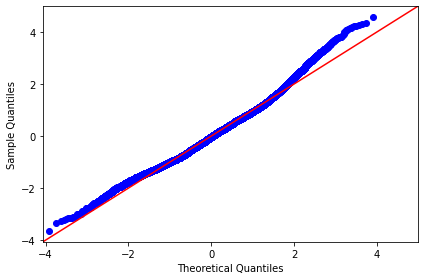

waterfront normality tests
['waterfront', 0.02609111161701494, -3.00454106039183e-15, 0.16152743301685382, 6.737030473593488e-126, 546.5383729280343]


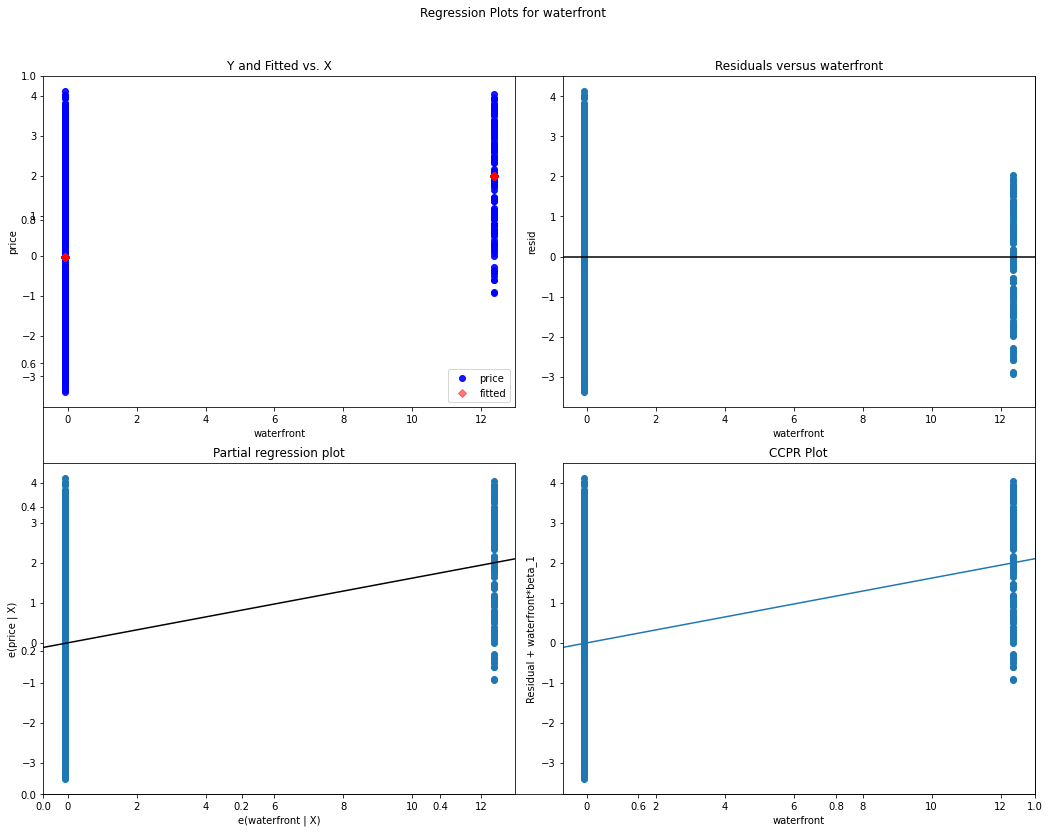

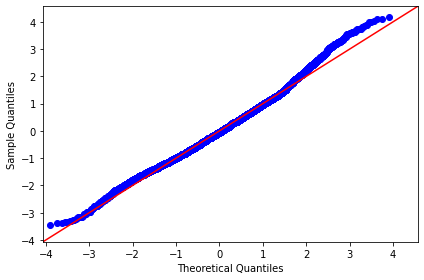

view normality tests
['view', 0.11286622721041295, -3.00454106039183e-15, 0.3359556923322095, 0.0, 306.5873488516771]


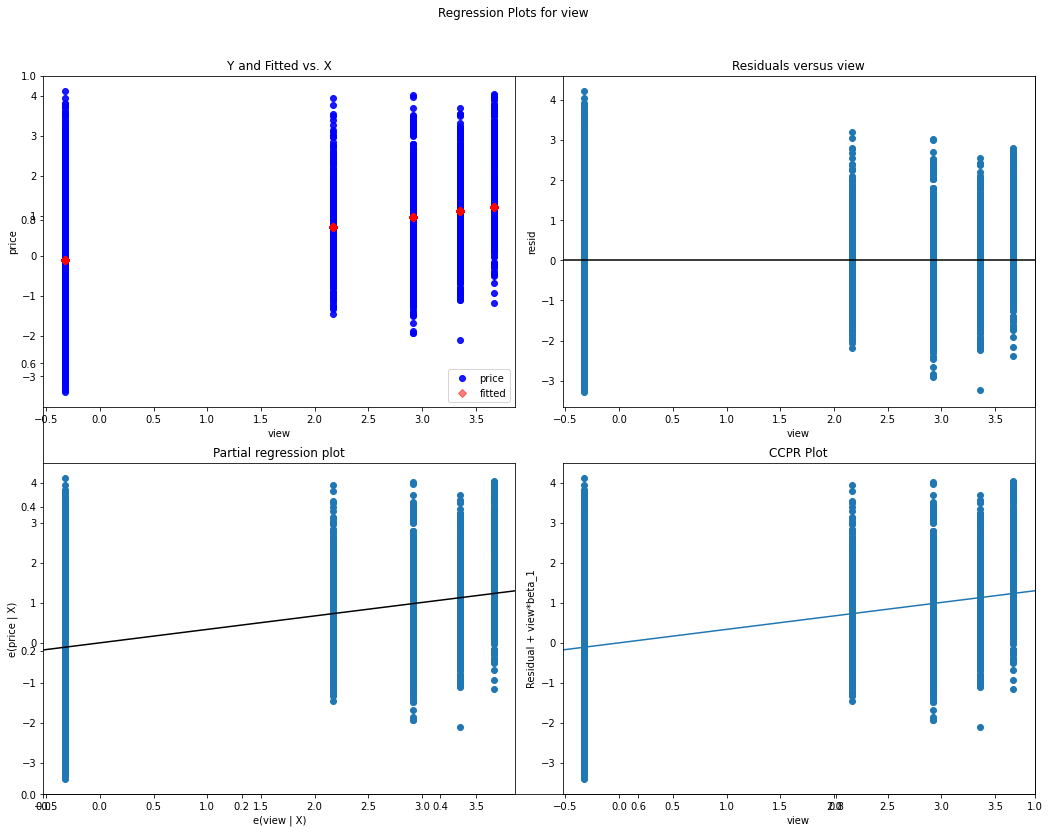

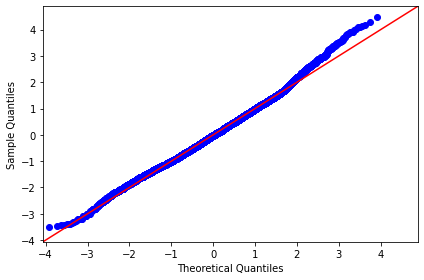

condition normality tests
['condition', 0.001972288550593837, -3.00454106039183e-15, 0.044410455419796435, 6.93265990765091e-11, 785.7890748672197]


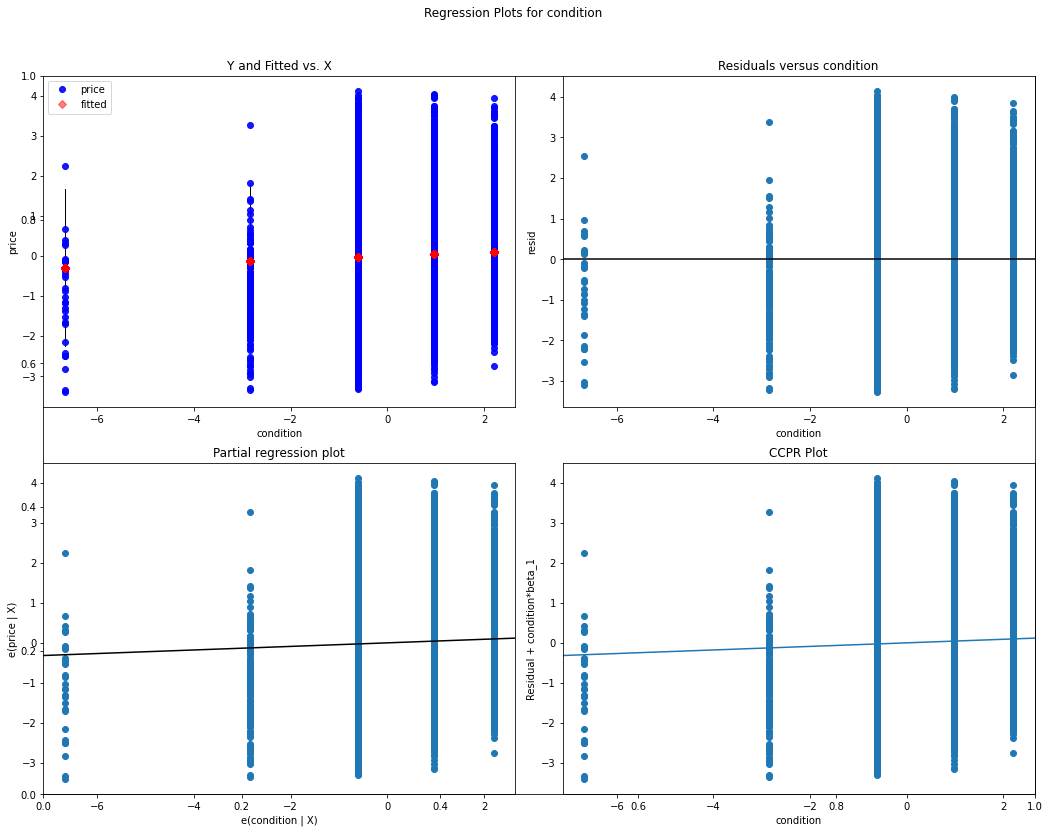

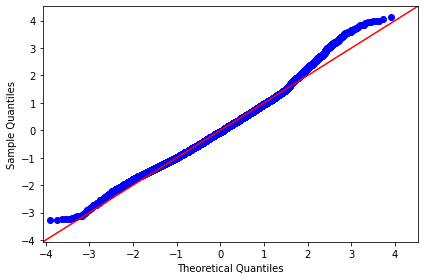

grade normality tests
['grade', 0.4782572067851023, -3.00454106039183e-15, 0.691561426617407, 0.0, 177.0272133431087]


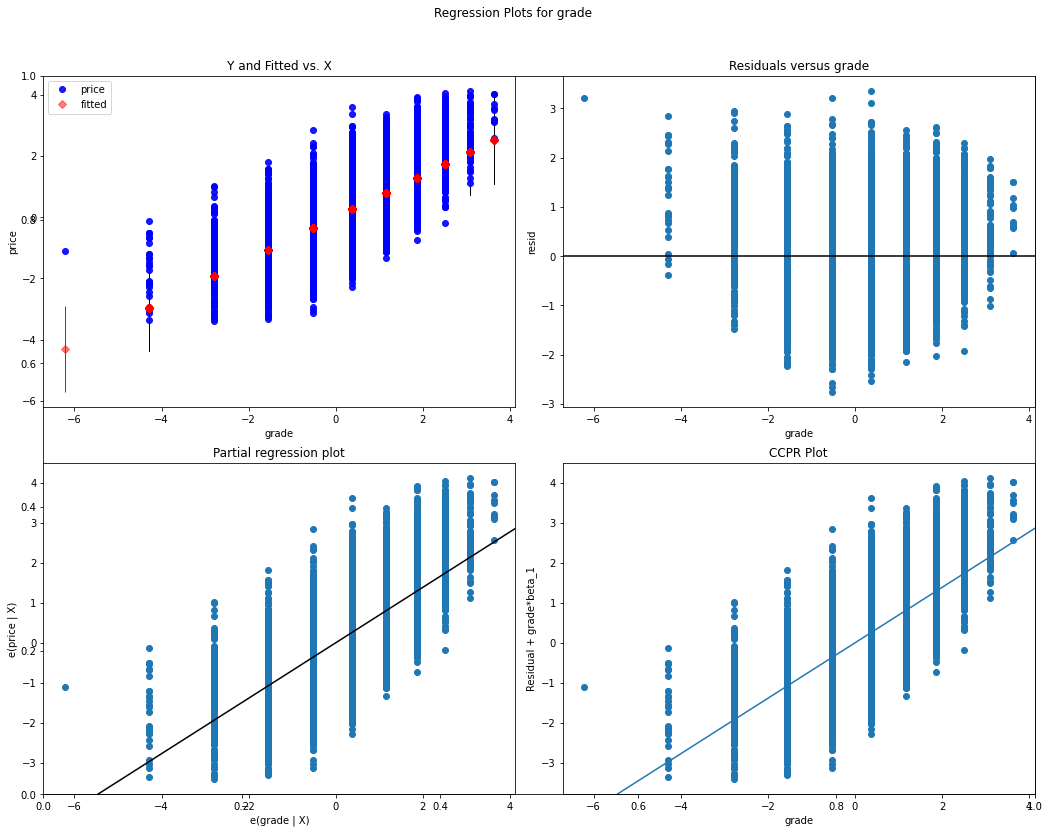

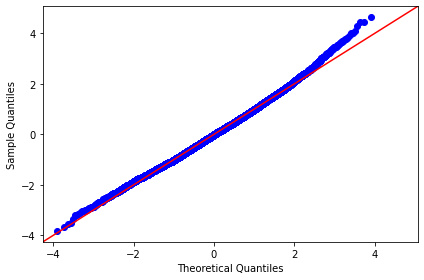

sqft_above normality tests
['sqft_above', 0.33934444165203903, -3.00454106039183e-15, 0.5825327816115063, 0.0, 130.36871545370448]


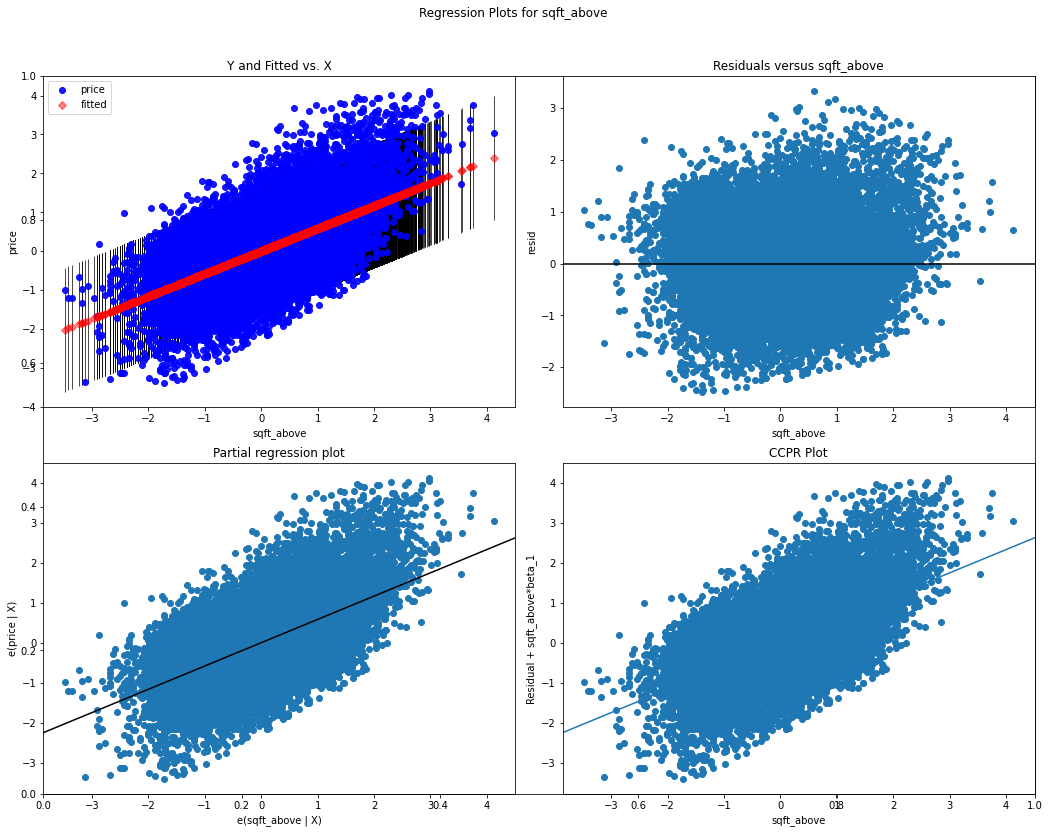

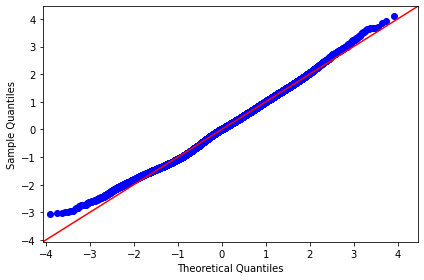

sqft_basement normality tests
['sqft_basement', 0.051029805987547694, -3.00454106039183e-15, 0.22589777773928515, 2.0489905787196533e-247, 748.3071748606354]


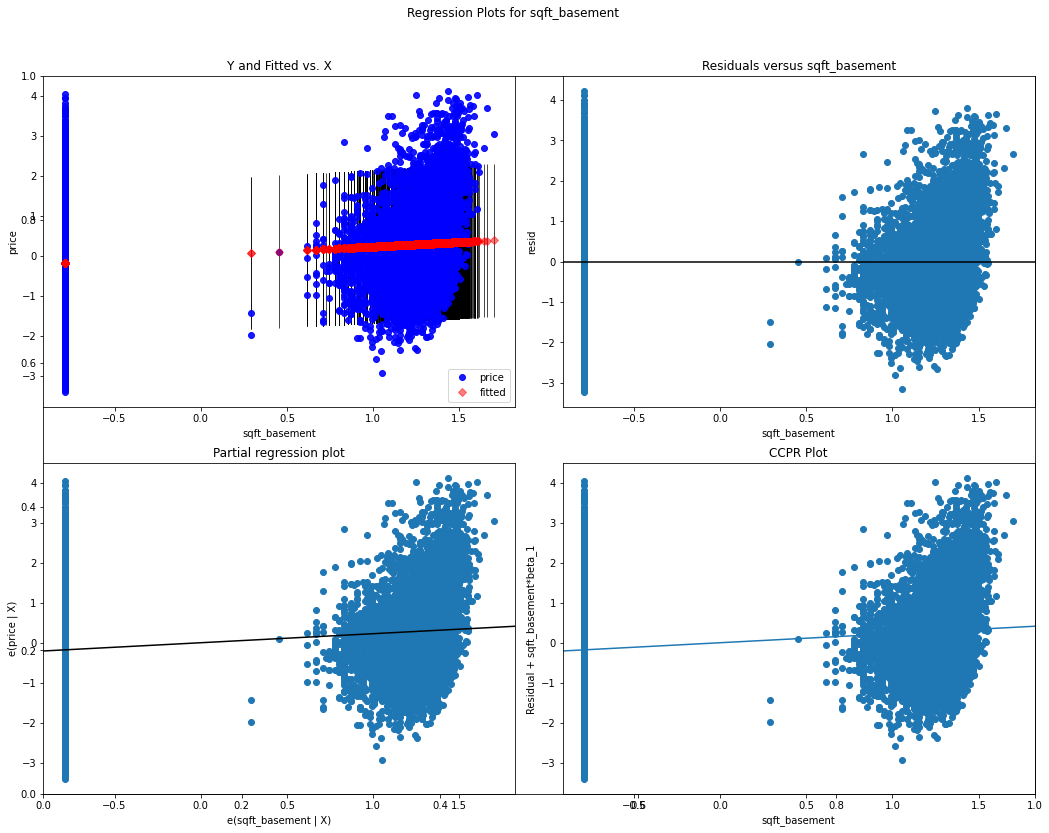

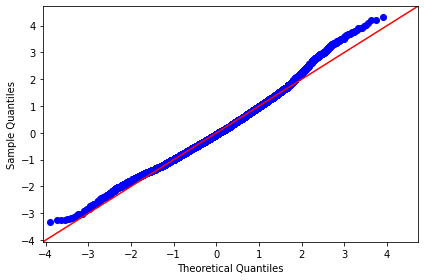

yr_built normality tests
['yr_built', 0.005995375270845926, -4.926614671774132e-15, 0.07742980867111876, 5.0937233946471084e-30, 838.5324646017624]


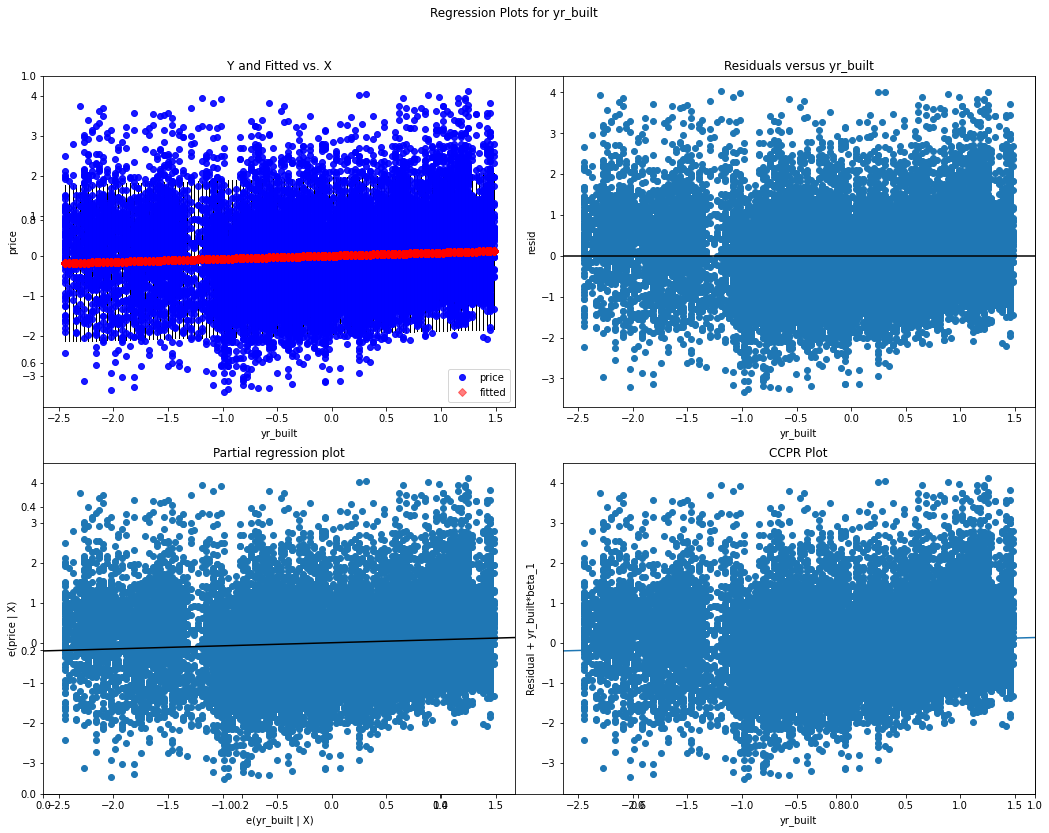

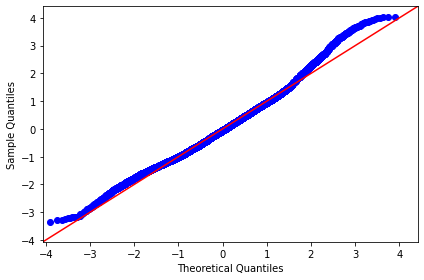

yr_renovated normality tests
['yr_renovated', 0.010866023520732182, -3.00454106039183e-15, 0.10424022026421234, 3.948445558953866e-53, 742.195120495396]


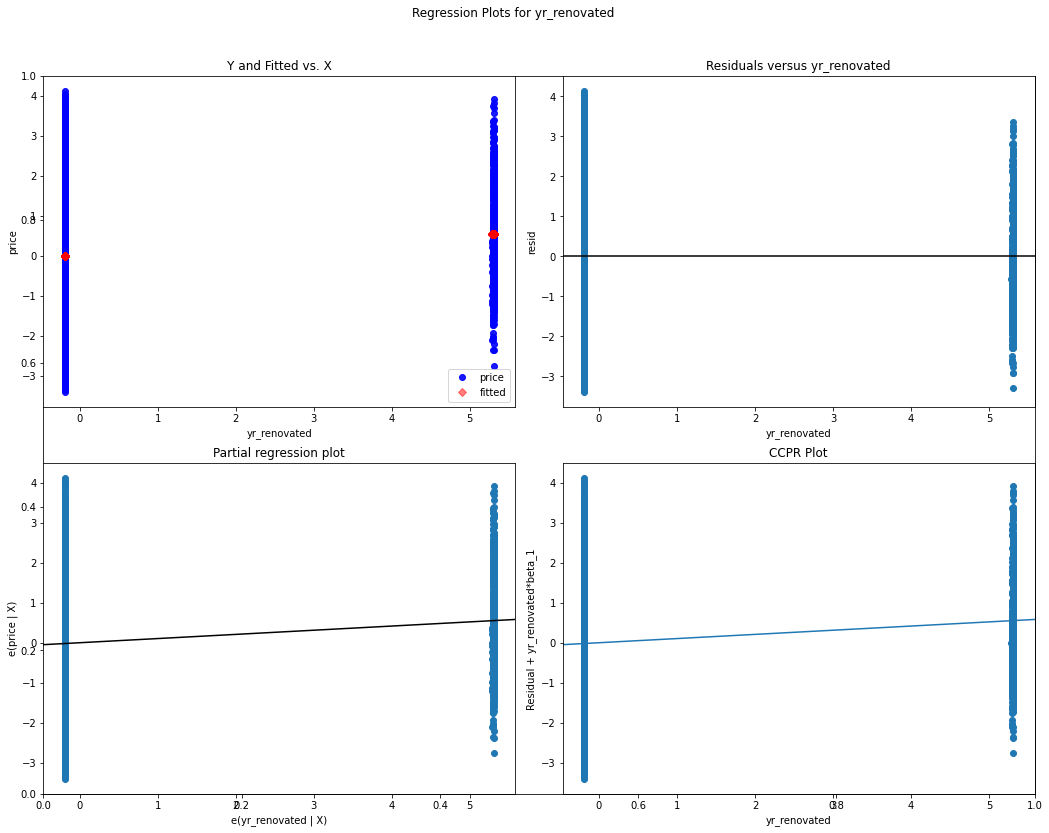

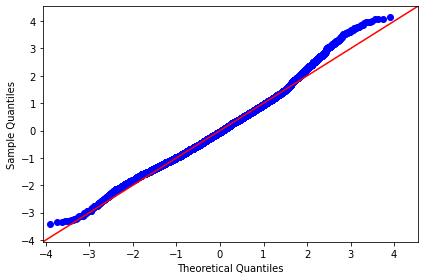

lat normality tests
['lat', 0.20480259105398546, 1.3097162243624894e-14, 0.452551202687591, 0.0, 2119.222447092599]


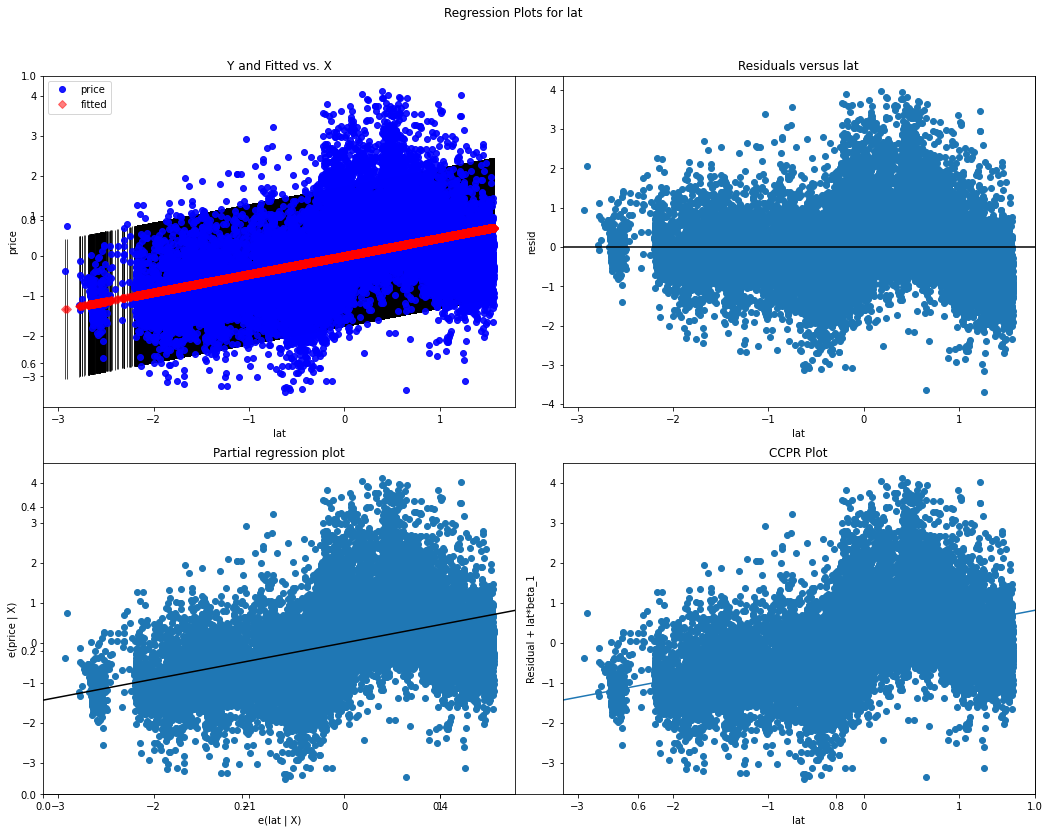

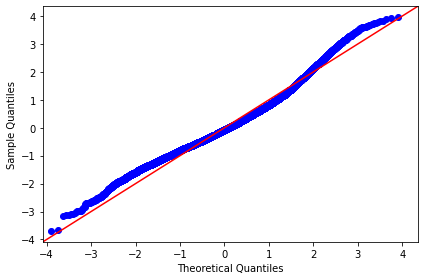

long normality tests
['long', 0.002503775999697533, -3.910066714851723e-15, -0.0500377457495603, 1.989386268703832e-13, 850.5718330556911]


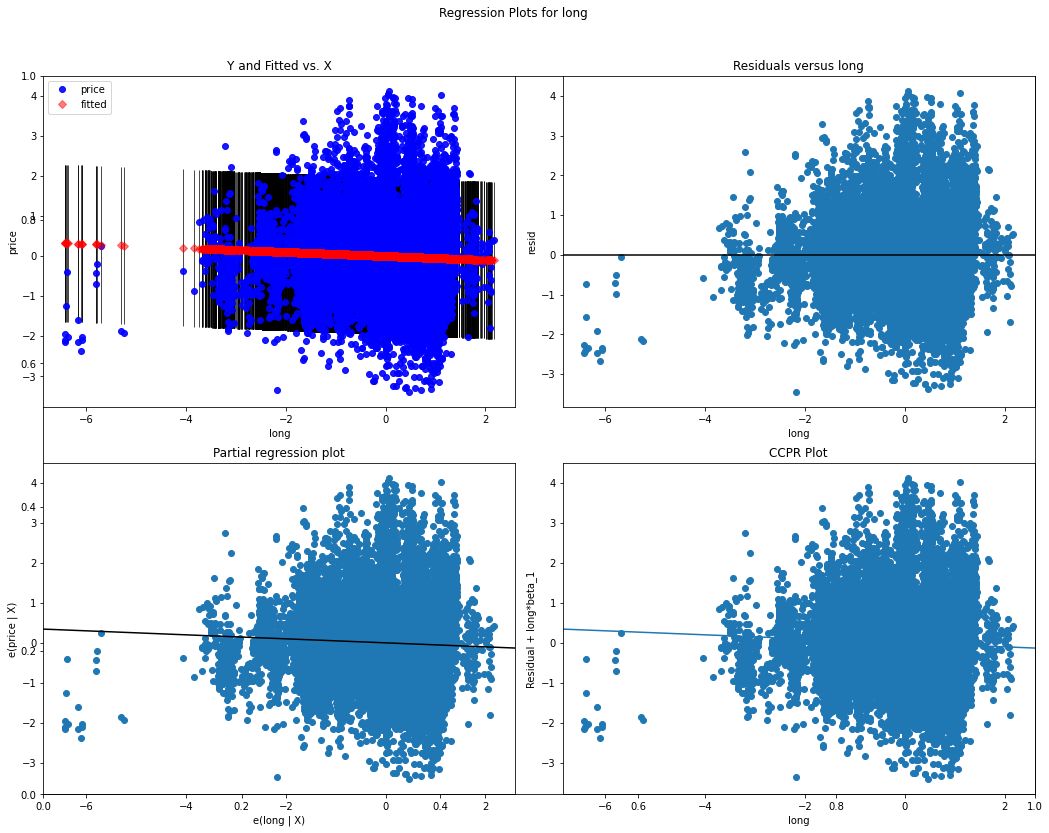

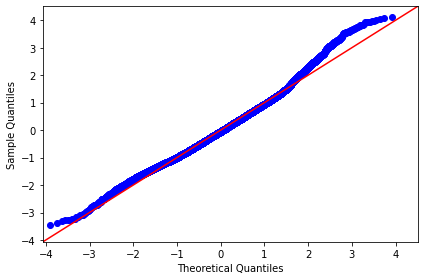

sqft_living15 normality tests
['sqft_living15', 0.36781383073367013, -3.00454106039183e-15, 0.6064765706386932, 0.0, 339.3135041339571]


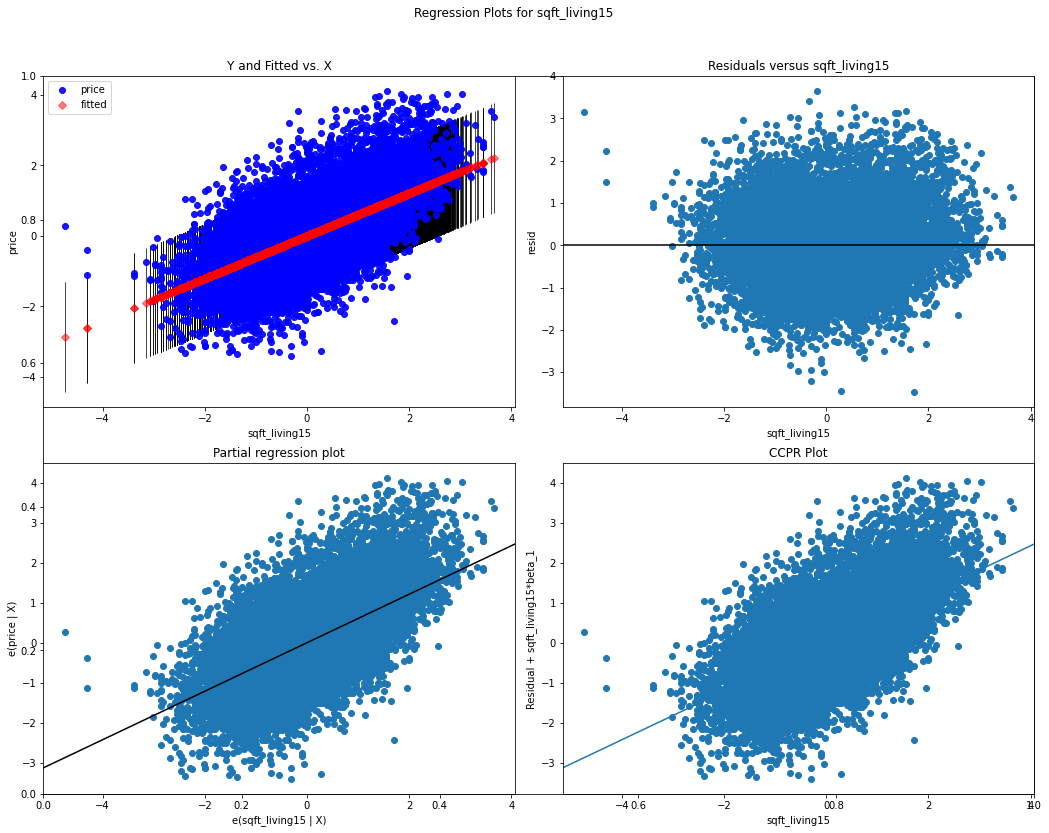

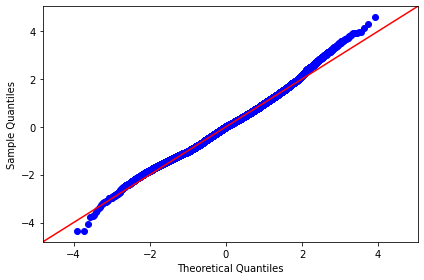

sqft_lot15 normality tests
['sqft_lot15', 0.014461351160781954, -3.00454106039183e-15, 0.12025535813751555, 3.1401673849923806e-70, 570.1185800712748]


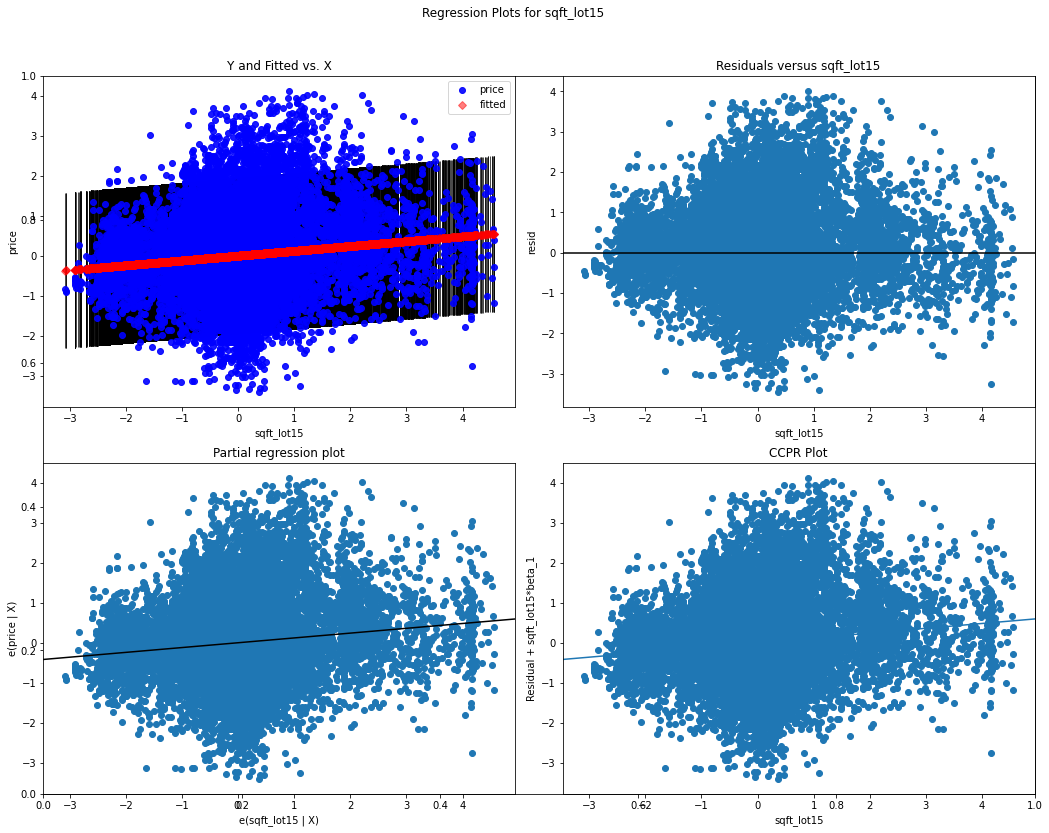

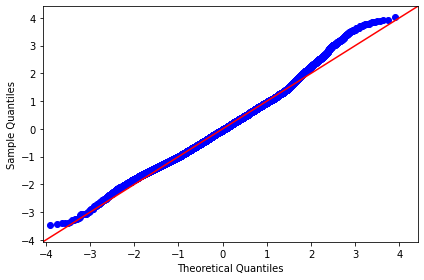

year_sold normality tests
['year_sold', 2.418851999219651e-05, 1.3742479376688266e-14, 0.004918182590370161, 0.4703369516047444, 798.2449063298861]


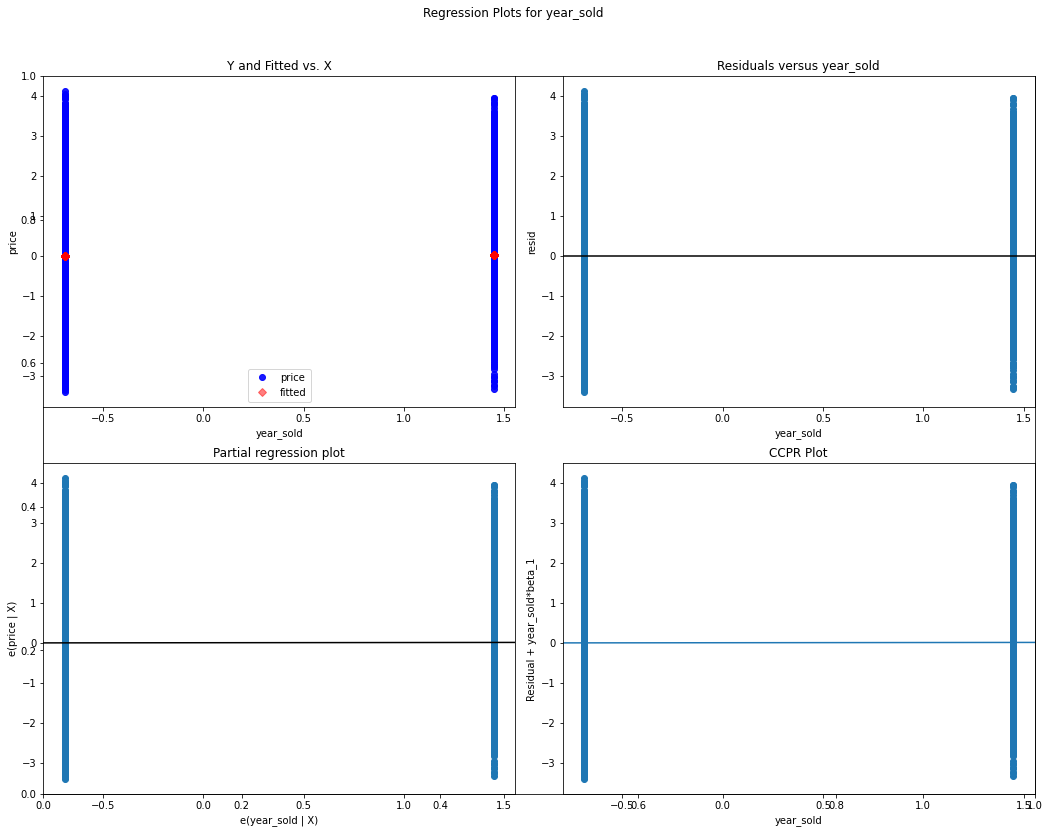

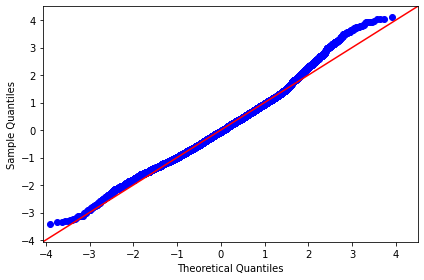

In [100]:
results=[]
for col in preprocessed.columns:
    f = f'price~{col}'
    model = smf.ols(formula=f, data=preprocessed).fit()

    print(f'{col} normality tests')
    result=[col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]]
    results.append(result)
    print(result)
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

In [103]:
lin_assump = ['sqft_living15', 'lat', 'sqft_basement', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'bedrooms']

In [104]:
X_w_ass = X[lin_assump]
X_w_ass.head()

,sqft_living15,lat,sqft_basement,sqft_above,grade,sqft_living,bathrooms,bedrooms
0,-1.034771,-0.353017,-0.788022,-0.753188,-0.525665,-1.126903,-1.728095,-0.279539
1,-0.325589,1.160122,1.153823,0.677794,-0.525665,0.714843,0.342214,-0.279539
2,1.128792,1.281720,-0.788022,-1.755886,-1.561499,-2.136939,-1.728095,-1.712765
3,-0.989495,-0.283633,1.346269,-1.027362,-0.525665,0.073723,1.076668,0.737351
4,-0.132880,0.409435,-0.788022,0.076631,0.371615,-0.291011,0.041513,-0.279539


In [107]:
w_ass = np.mean(cross_val_score(regression, X_w_ass, y, scoring='r2', cv=crossvalidation))

In [108]:
w_ass

0.7017023637472625

In [114]:
co_df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
co_df

,level_0,level_1,0
0,bedrooms,bedrooms,1.000000
171,sqft_above,sqft_above,1.000000
57,sqft_lot,sqft_lot,1.000000
76,floors,floors,1.000000
95,waterfront,waterfront,1.000000
...,...,...,...
317,year_sold,yr_built,0.003376
312,year_sold,view,0.002902
125,view,year_sold,0.002902
269,long,year_sold,0.000975


In [115]:
co_df['pairs'] = list(zip(co_df.level_0, co_df.level_1))
co_df.set_index(['pairs'], inplace = True)

co_df

,level_0,level_1,0
pairs,,,
"(bedrooms, bedrooms)",bedrooms,bedrooms,1.000000
"(sqft_above, sqft_above)",sqft_above,sqft_above,1.000000
"(sqft_lot, sqft_lot)",sqft_lot,sqft_lot,1.000000
"(floors, floors)",floors,floors,1.000000
"(waterfront, waterfront)",waterfront,waterfront,1.000000
...,...,...,...
"(year_sold, yr_built)",year_sold,yr_built,0.003376
"(year_sold, view)",year_sold,view,0.002902
"(view, year_sold)",view,year_sold,0.002902


In [116]:
co_df.drop(columns=['level_1', 'level_0'], inplace = True)
co_df.columns = ['cc']
co_df.drop_duplicates(inplace=True)
co_df = co_df[(co_df.cc>.75) & (co_df.cc<1)]
co_df

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.919531
"(sqft_above, sqft_living)",0.863984
"(bathrooms, sqft_living)",0.759533


In [142]:
X.drop(columns=['sqft_lot15', 'sqft_above', 'bathrooms'], inplace = True)

In [153]:
y

,price
0,-1.406675
1,0.284770
2,-1.806354
3,0.505772
4,0.182691
...,...
21592,-0.482530
21593,-0.281305
21594,-0.271300
21595,-0.281305


In [125]:
no_co = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

In [126]:
no_co

0.7631969255532314

In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X, y)

In [128]:
selected_columns = X.columns[selector.support_ ]
print(selected_columns)

Index(['sqft_living', 'view', 'grade', 'yr_built', 'lat'], dtype='object')


In [144]:
x_sel = X[selected_columns]
x_sel

,sqft_living,view,grade,yr_built,lat
0,-1.126903,-0.324805,-0.525665,-0.537048,-0.353017
1,0.714843,-0.324805,-0.525665,-0.673981,1.160122
2,-2.136939,-0.324805,-1.561499,-1.293675,1.281720
3,0.073723,-0.324805,-0.525665,-0.195937,-0.283633
4,-0.291011,-0.324805,0.371615,0.548437,0.409435
...,...,...,...,...,...
21592,-0.512303,-0.324805,0.371615,1.284614,1.003924
21593,0.462480,-0.324805,0.371615,1.450802,-0.356631
21594,-1.471671,-0.324805,-0.525665,1.284614,0.247844
21595,-0.406453,-0.324805,0.371615,1.118011,-0.184641


In [154]:
fivebest = np.mean(cross_val_score(regression, x_sel, y, scoring='r2', cv=crossvalidation))
fivebest

0.7396584905960688

In [155]:
y

,price
0,-1.406675
1,0.284770
2,-1.806354
3,0.505772
4,0.182691
...,...
21592,-0.482530
21593,-0.281305
21594,-0.271300
21595,-0.281305


In [156]:
combs = combinations(X.columns, 2)
 
interactions=[]

data_int = X.copy()
for i, (a, b) in enumerate(combs):
    data_int['interaction'] = data_int[a] * data_int[b]
    score = np.mean(cross_val_score(regression, data_int, y, scoring='r2', cv=crossvalidation))
    print(score)
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0.7685245748675731
0
0.7691281460712872
0.7664187224935013
0.7676828905514743
0.7664438634776649
0.7664448754107874
0.7663971472265578
0.7700148485682223
0.7694343793534567
0.7664629739144968
0.766872616158145
0.7665109036543585
0.7664752092143974
0.7666413460036768
0.7673982609649197
0.766429377954414
0.7664750161209408
0.771742619828152
0.7667328340954592
0.7674425173354821
0.7664102868808819
0.7664543540510049
0.7664585649161972
0.7722307727380296
0.7713639040317894
0.7668525344708754
0.7691375066299047
0.7665511457759691
0.7664197665648868
0.7664520186746118
0.7673737469415081
0.7668234296135222
0.7664754849366993
0.7667084614184049
0.7682029482364818
0.7664643639359141
0.7664994443314204
0.7664209251390233
0.7727754079479064
0.772013947563265
0.7667934306907546
0.7686696684851653
0.7665685764723429
0.7664271238994378
0.7664485167896389
0.7681379748337137
0.7667312877280625
0.766508414239498
0.7664937631567292
0.7664346023847656
0.7665349796902421
50
0.7664128220098727
0.7664101379

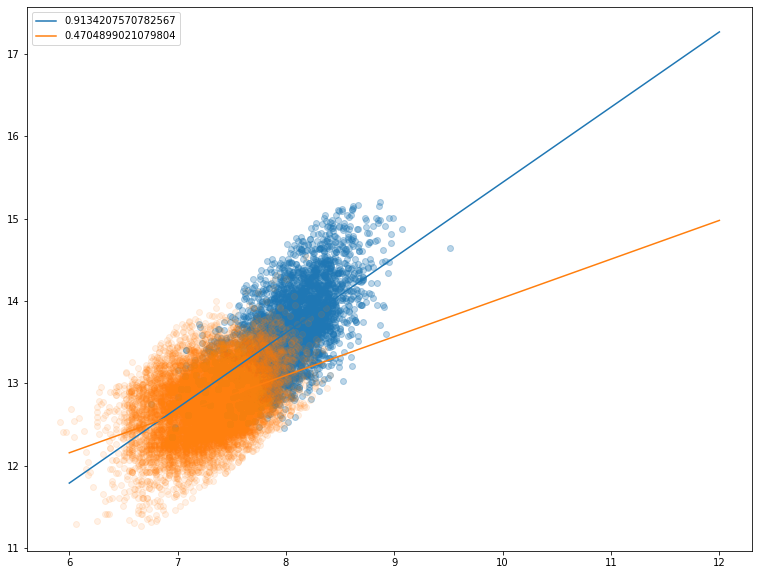

In [166]:
fig, ax = plt.subplots(figsize=(13, 10))

col = 'sqft_living'

is_in = no_outliers.loc[no_outliers['grade'] >8, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label= linreg.coef_[0])

not_in = no_outliers.loc[no_outliers['grade'] <8, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['price']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['price']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=linreg.coef_[0])

ax.legend()

In [167]:
final = X.copy()

final['sqft_living * grade'] = final['sqft_living'] * final['grade']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.7727754079479064

In [168]:
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              3833.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:37:58   Log-Likelihood:                         -14655.
No. Observations:               21549   AIC:                                  2.935e+04
Df Residuals:                   21530   BIC:                                  2.950e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms               -0.0467      0.004    -10.436      0.000      -0.056      -0.038
bathrooms               0.0742      0.006     12.341      0.000       0.062       0.086
sqft_living             0.1701      0.015     11.055      0.000       0.140       0.200
sqft_lot                0.0237      0.009      2.732      0.006       0.007       0.041
floors                  0.0476      0.005      9.313      0.000       0.038       0.058
waterfront              0.0720      0.003     21.035      0.000       0.065       0.079
view                    0.0883      0.004     23.966      0.000       0.081       0.096
condition               0.0847      0.004     23.477      0.000       0.078       0.092
grade                   0.3458      0.006     59.638      0.000       0.334       0.357
sqft_above              0.1357      0.015      9.005      0.000       0.106       0.165
sqft_basement           0.0698      0.007      9.514      0.000       0.055       0.084
yr_built               -0.1915      0.005    -38.048      0.000      -0.201      -0.182
yr_renovated            0.0290      0.003      8.425      0.000       0.022       0.036
lat                     0.3553      0.003    102.144      0.000       0.348       0.362
long                   -0.0008      0.004     -0.198      0.843      -0.009       0.007
sqft_living15           0.1374      0.006     24.891      0.000       0.127       0.148
sqft_lot15             -0.0695      0.008     -8.220      0.000      -0.086      -0.053
year_sold               0.0453      0.003     13.864      0.000       0.039       0.052
sqft_living * grade     0.0473      0.002     20.987      0.000       0.043       0.052
==============================================================================
Omnibus:                      449.538   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.840
Skew:                           0.121   Prob(JB):                    9.79e-194
Kurtosis:                       3.965   Cond. No.                         15.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#zip codes, real r